# Transport Data Science Project

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Introduction
### Transport Data Science Project (TDSP)
The Transport Data Science Project was a 4 week data science and research program centered on analyzing the New York City Department of Transportation's [Motor Vehicle Collision Dataset](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Vehicles/bm4k-52h4/about_data). During my cycle of the TDSP program there were a roughly a thousand participants, I was one of 20 to be selected to present my research to the NYC Department of Transportation in a virtual research symposium. 

### This Notebook
Below is my work doing exploratory data analysis to understand the data better. The first few lines of code were problem sets from the program however quickly after that I do my own more complicated analysis to identify potential feature variables for different machine learning models. 

### ML Task: Predicting Injury vs Fatality for Collisions
In this project my main goal is to try to predict whether or not certain motor vehicle collision leads to at least one injury or at least one fatality. 

## Exploratory Data Analysis

### Loading Data

In [11]:
vehicle_path = os.path.abspath(os.path.join(os.path.dirname('intro.ipynb'), '..', 'data/raw/nyc-vehicle.csv')) 
crashes_path = os.path.abspath(os.path.join(os.path.dirname('intro.ipynb'), '..', 'data/raw/nyc-crashes.csv')) 

rVehicle = pd.read_csv(vehicle_path)
rCrashes = pd.read_csv(crashes_path)

/var/folders/67/0s5rn4vn3sd9vsmn400fmxr00000gn/T/ipykernel_19531/2603174715.py:4: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  rVehicle = pd.read_csv(vehicle_path)
/var/folders/67/0s5rn4vn3sd9vsmn400fmxr00000gn/T/ipykernel_19531/2603174715.py:5: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  rCrashes = pd.read_csv(crashes_path)


In [12]:
rVehicle.head(5)

,unique_id,collision_id,crash_date,crash_time,vehicle_id,state_registration,vehicle_type,contributing_factor_1,vehicle_make,vehicle_year,...,pre_crash,point_of_impact,vehicle_damage,public_property_damage,contributing_factor_2,vehicle_damage_1,vehicle_damage_2,vehicle_damage_3,vehicle_model,public_property_damage_type
0,10385780,100201,2012-09-07T00:00:00.000,9:03,1,NY,PASSENGER VEHICLE,Unspecified,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19140702,4213082,2019-09-23T00:00:00.000,8:15,0553ab4d-9500-4cba-8d98-f4d7f89d5856,NY,Station Wagon/Sport Utility Vehicle,Driver Inattention/Distraction,TOYT -CAR/SUV,2002.0,...,Going Straight Ahead,Left Front Bumper,Left Front Quarter Panel,N,Unspecified,NaN,NaN,NaN,NaN,NaN
2,14887647,3307608,2015-10-02T00:00:00.000,17:18,2,NY,TAXI,Driver Inattention/Distraction,NaN,NaN,...,Going Straight Ahead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14889754,3308693,2015-10-04T00:00:00.000,20:34,1,NY,PASSENGER VEHICLE,Unspecified,NaN,NaN,...,Parked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14400270,297666,2013-04-25T00:00:00.000,21:15,1,NY,PASSENGER VEHICLE,Other Vehicular,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
rCrashes.head(5)

,crash_date,crash_time,on_street_name,off_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,...,latitude,longitude,location,contributing_factor_vehicle_3,vehicle_type_code_3,cross_street_name,contributing_factor_vehicle_4,vehicle_type_code_4,contributing_factor_vehicle_5,vehicle_type_code_5
0,2021-09-11T00:00:00.000,2:39,WHITESTONE EXPRESSWAY,20 AVENUE,2.0,0.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-03-26T00:00:00.000,11:45,QUEENSBORO BRIDGE UPPER,NaN,1.0,0.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-11-01T00:00:00.000,1:29,OCEAN PARKWAY,AVENUE K,1.0,0.0,0,0,0,0,...,40.62179,-73.970024,"{'latitude': '40.62179', 'longitude': '-73.970...",Unspecified,Sedan,NaN,NaN,NaN,NaN,NaN
3,2022-06-29T00:00:00.000,6:55,THROGS NECK BRIDGE,NaN,0.0,0.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-09-21T00:00:00.000,13:21,BROOKLYN BRIDGE,NaN,0.0,0.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
print("Num rows in rVehicle: ", len(rVehicle))
print("rVehicle Columns: ", rVehicle.columns)
print("Num rows in rCrashes: ", len(rCrashes))
print("rCrashes Columns: ", rCrashes.columns)

Num rows in rVehicle:  4389391
rVehicle Columns:  Index(['unique_id', 'collision_id', 'crash_date', 'crash_time', 'vehicle_id',
       'state_registration', 'vehicle_type', 'contributing_factor_1',
       'vehicle_make', 'vehicle_year', 'travel_direction', 'vehicle_occupants',
       'driver_sex', 'driver_license_status', 'driver_license_jurisdiction',
       'pre_crash', 'point_of_impact', 'vehicle_damage',
       'public_property_damage', 'contributing_factor_2', 'vehicle_damage_1',
       'vehicle_damage_2', 'vehicle_damage_3', 'vehicle_model',
       'public_property_damage_type'],
      dtype='object')
Num rows in rCrashes:  2187413
rCrashes Columns:  Index(['crash_date', 'crash_time', 'on_street_name', 'off_street_name',
       'number_of_persons_injured', 'number_of_persons_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def reporting(col, name, dropna=False, continuous=True, topten=True, exclude_outliers=False):
    col = pd.Series(col)
    if dropna:
        col = col.dropna()

    if continuous:
        data = col.copy()

        if exclude_outliers:
            # Use IQR method to exclude outliers
            Q1 = data.quantile(0.25)
            Q3 = data.quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            data = data[(data >= lower) & (data <= upper)]
            print(f"{name}: {len(col) - len(data)} outliers excluded")

        mean = data.mean()
        count = data.count()
        max_val = data.max()
        min_val = data.min()
        print(f"{name} mean: {mean:.2f} | count: {count}")
        print(f"{name} max: {max_val} | min: {min_val}")

        plt.hist(data, density=True, bins=30, edgecolor='black')
        plt.title(f"Distribution of {name}")
        plt.xlabel(name)
        plt.ylabel("Probability Density")
        plt.show()

    else:
        counts = col.value_counts(dropna=dropna)
        vals = counts.index.to_list()
        if topten:
            counts = counts[:10]
            vals = vals[:10]
        counts_list = counts.to_list()
        most_common = vals[np.argmax(counts_list)]
        least_common = vals[np.argmin(counts_list)]
        print(f"{name} most common: {most_common}, count: {np.max(counts_list)}")
        print(f"{name} least common: {least_common}, count: {np.min(counts_list)}")

        plt.bar([str(v) for v in vals], counts_list)
        plt.title(f"Top Categories in {name}")
        plt.xlabel("Values")
        plt.ylabel("Counts")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


### Initial Analysis

In [20]:
rVehCols = ['vehicle_type', 
        'contributing_factor_1',
        'vehicle_make', 
        'vehicle_year', 
        'travel_direction', 
        'vehicle_occupants',
        'driver_sex', 
        'driver_license_status', 
        'driver_license_jurisdiction',
        'pre_crash', 
        'point_of_impact', 
        'vehicle_damage',
       'public_property_damage', 
       'contributing_factor_2', 
       'vehicle_damage_1',
       'vehicle_damage_2', 
       'vehicle_damage_3', 
       'vehicle_model',
       'public_property_damage_type'
        ]
rCrashColsNum = ['number_of_persons_injured', 'number_of_persons_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed']
rCrashColsCat = ['contributing_factor_vehicle_1', 'borough', 'vehicle_type_code1']

vehicle_type most common: Sedan, count: 1126180
vehicle_type least common: TAXI, count: 60790


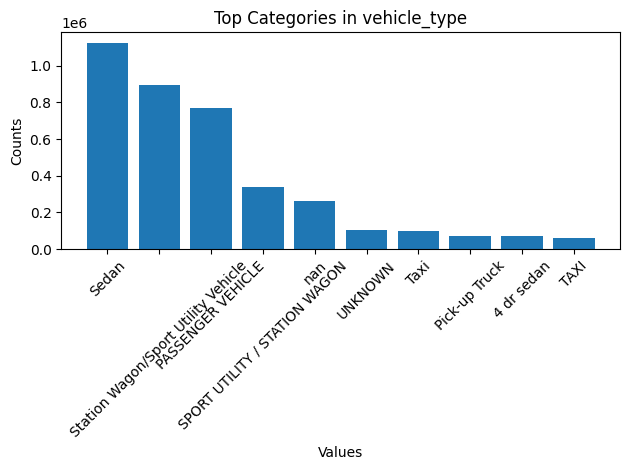

contributing_factor_1 most common: Unspecified, count: 2474553
contributing_factor_1 least common: Turning Improperly, count: 63547


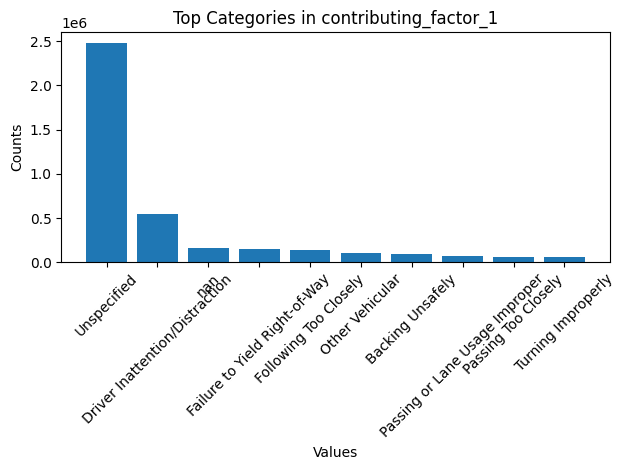

vehicle_make most common: nan, count: 1922423
vehicle_make least common: JEEP -CAR/SUV, count: 81077


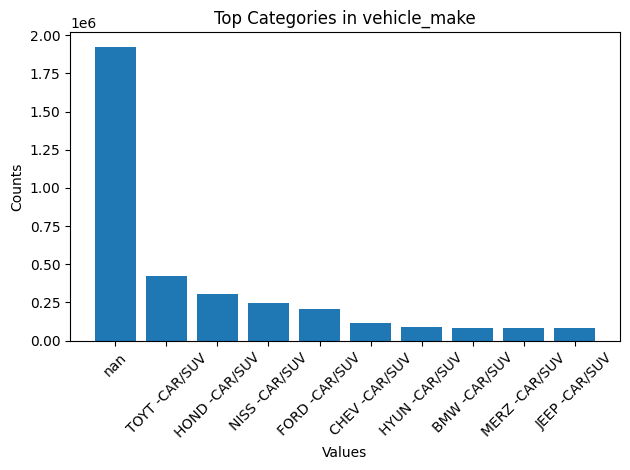

Errored on name vehicle_year, passing error message: 10
travel_direction most common: nan, count: 1682035
travel_direction least common: Northwest, count: 33079


/var/folders/67/0s5rn4vn3sd9vsmn400fmxr00000gn/T/ipykernel_19531/2323097339.py:40: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  counts = counts[:10]


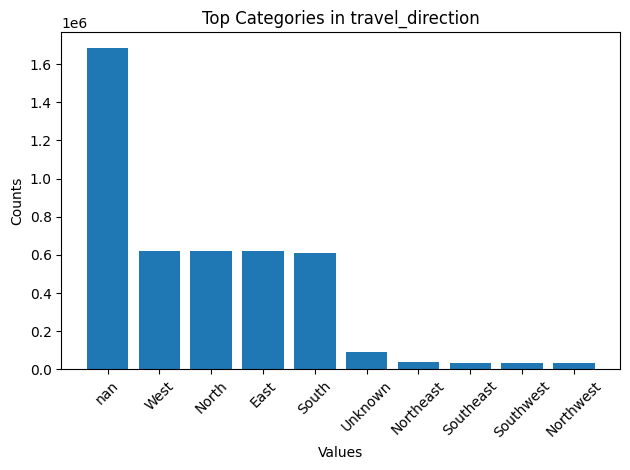

/var/folders/67/0s5rn4vn3sd9vsmn400fmxr00000gn/T/ipykernel_19531/2323097339.py:40: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  counts = counts[:10]


Errored on name vehicle_occupants, passing error message: list index out of range
driver_sex most common: nan, count: 2292081
driver_sex least common: U, count: 8829


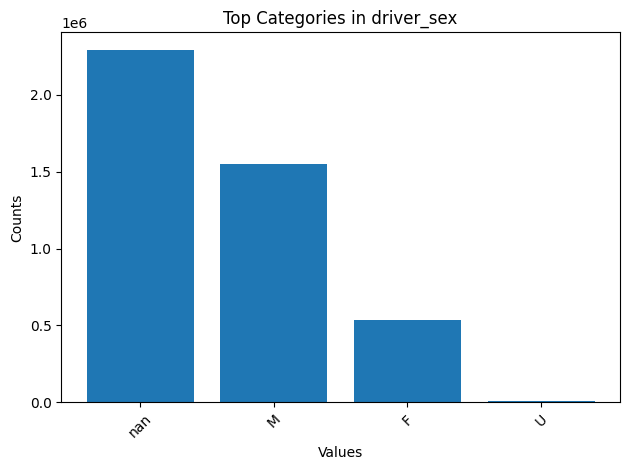

driver_license_status most common: nan, count: 2391442
driver_license_status least common: Permit, count: 19154


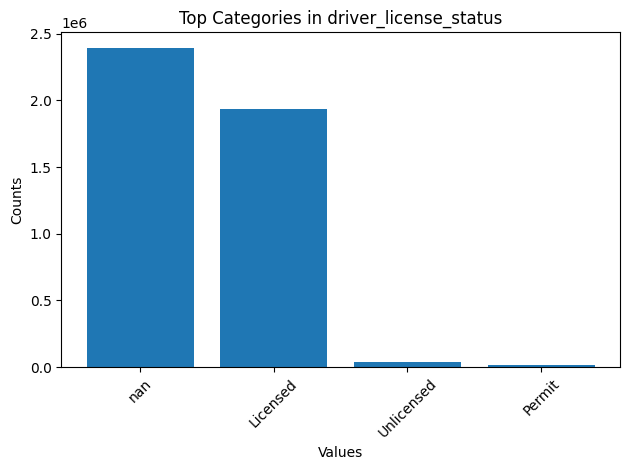

driver_license_jurisdiction most common: nan, count: 2387714
driver_license_jurisdiction least common: GA, count: 6669


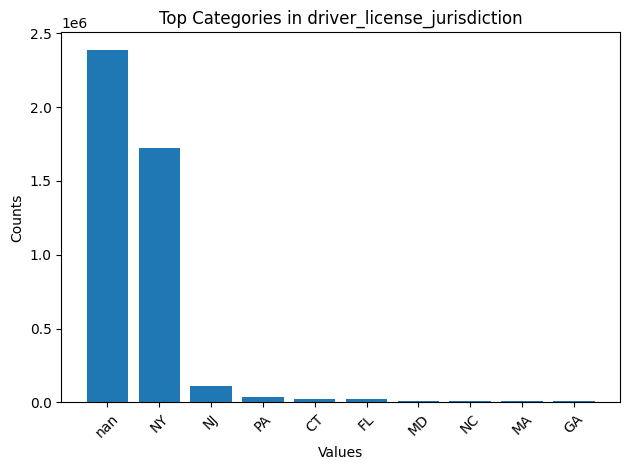

pre_crash most common: Going Straight Ahead, count: 1694711
pre_crash least common: Merging, count: 55567


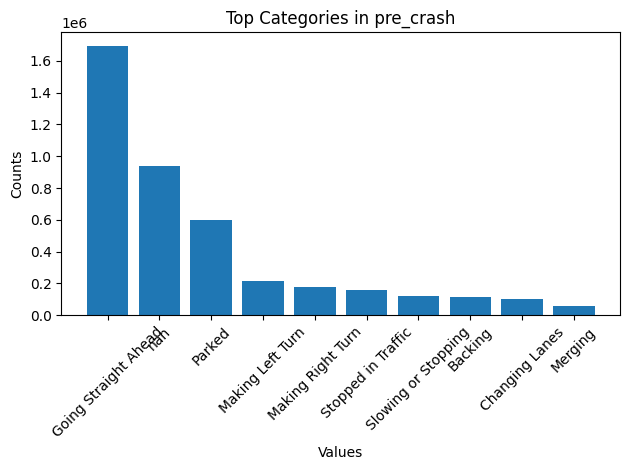

point_of_impact most common: nan, count: 1716526
point_of_impact least common: Left Rear Bumper, count: 140072


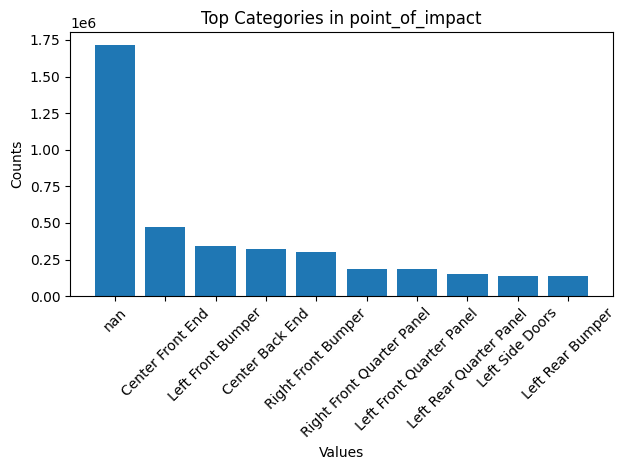

vehicle_damage most common: nan, count: 1743656
vehicle_damage least common: Left Rear Quarter Panel, count: 145280


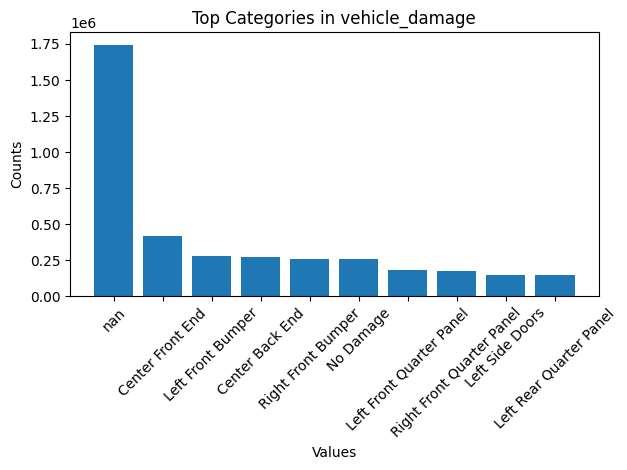

public_property_damage most common: N, count: 2492469
public_property_damage least common: Y, count: 16909


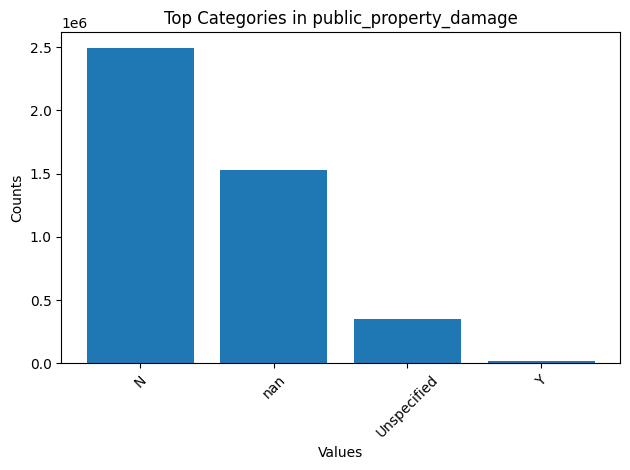

contributing_factor_2 most common: Unspecified, count: 2096593
contributing_factor_2 least common: Other Vehicular, count: 29758


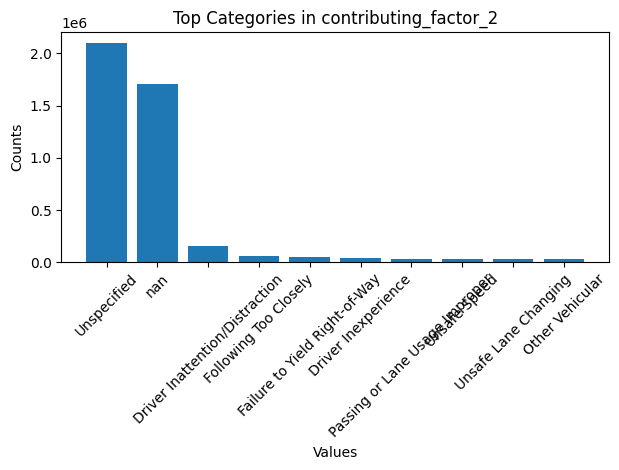

vehicle_damage_1 most common: nan, count: 2674919
vehicle_damage_1 least common: Left Rear Quarter Panel, count: 76964


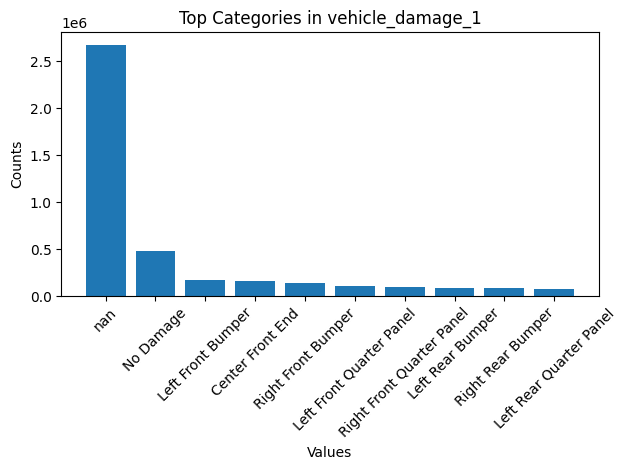

vehicle_damage_2 most common: nan, count: 3087534
vehicle_damage_2 least common: Left Rear Quarter Panel, count: 40894


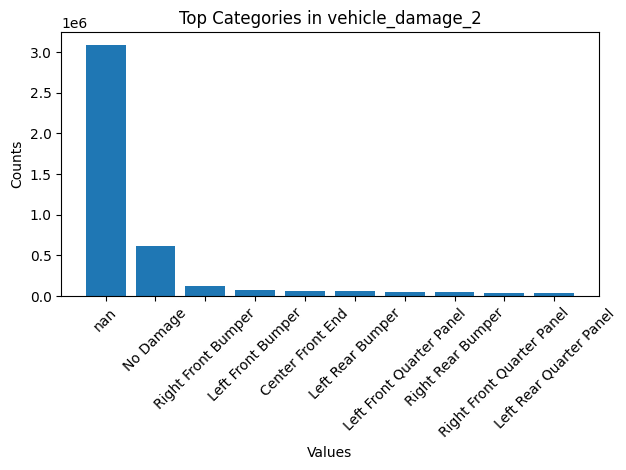

vehicle_damage_3 most common: nan, count: 3382594
vehicle_damage_3 least common: Left Rear Quarter Panel, count: 17203


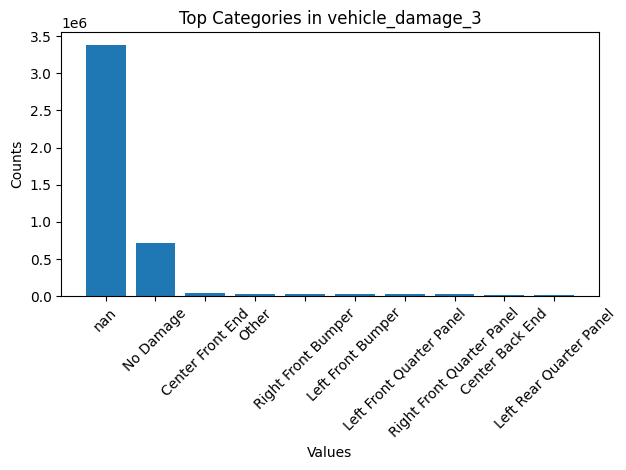

vehicle_model most common: nan, count: 4338012
vehicle_model least common: HOND ZZZ, count: 852


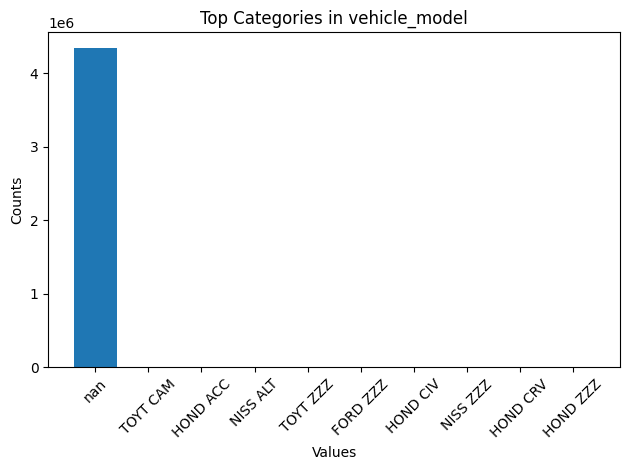

public_property_damage_type most common: nan, count: 4360272
public_property_damage_type least common: STOP SIGN, count: 104


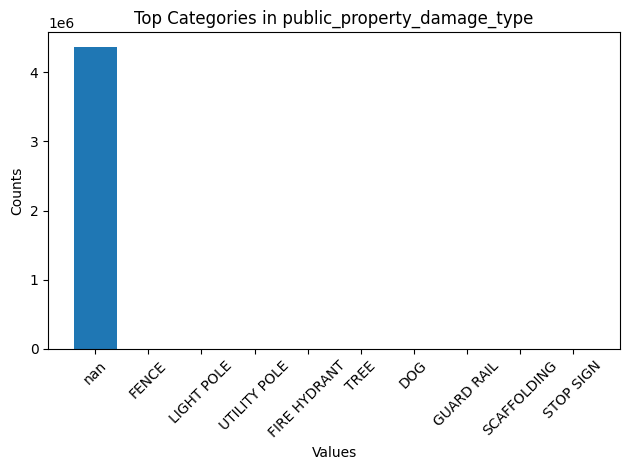

In [25]:
for name in rVehCols:
    try: reporting(col=rVehicle[name], name=name, continuous=False)
    except Exception as e:
        print(f"Errored on name {name}, passing error message: {e}")
        continue

contributing_factor_vehicle_1 most common: Unspecified, count: 734518
contributing_factor_vehicle_1 least common: Fatigued/Drowsy, count: 47499


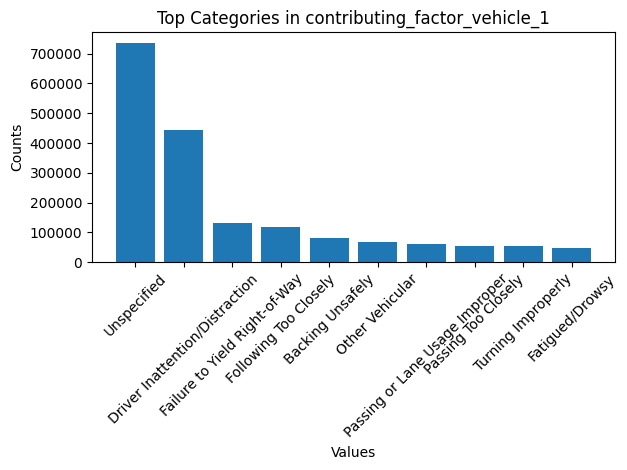

borough most common: nan, count: 673773
borough least common: STATEN ISLAND, count: 63442


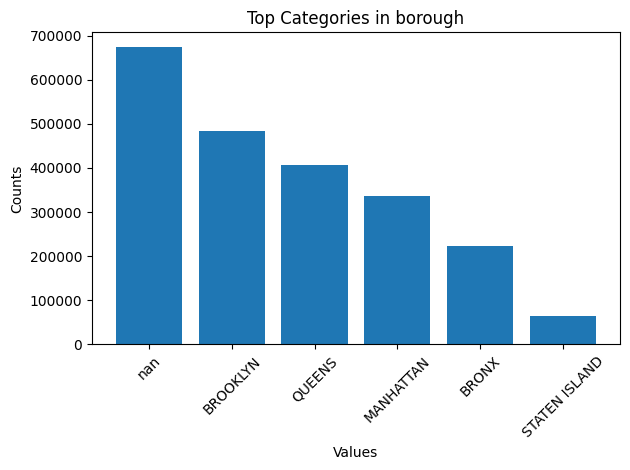

vehicle_type_code1 most common: Sedan, count: 627066
vehicle_type_code1 least common: VAN, count: 25242


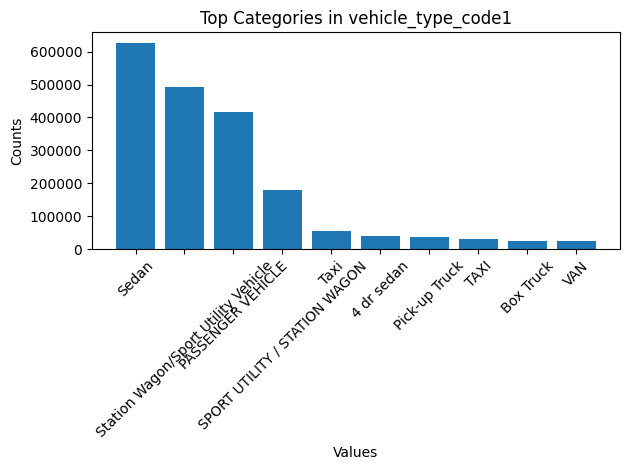

In [26]:
for name in rCrashColsCat:
    try: reporting(col=rCrashes[name], name=name, continuous=False)
    except Exception as e:
        print(f"Errored on name {name}, passing error message: {e}")
        continue

number_of_persons_injured mean: 0.32 | count: 2187395
number_of_persons_injured max: 43.0 | min: 0.0


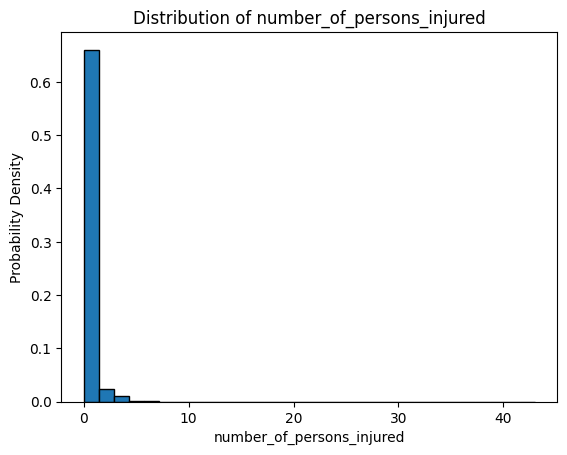

number_of_persons_killed mean: 0.00 | count: 2187382
number_of_persons_killed max: 8.0 | min: 0.0


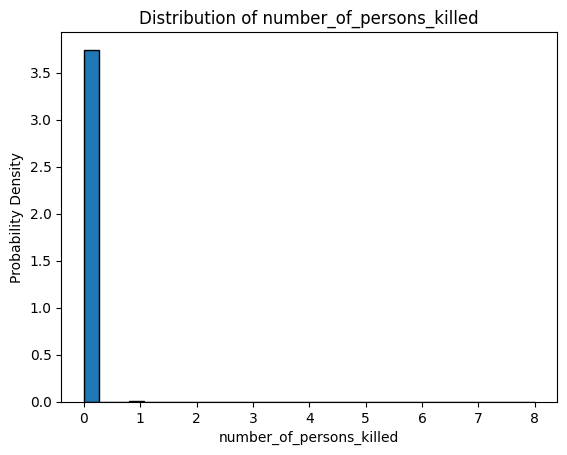

number_of_pedestrians_injured mean: 0.06 | count: 2187413
number_of_pedestrians_injured max: 27 | min: 0


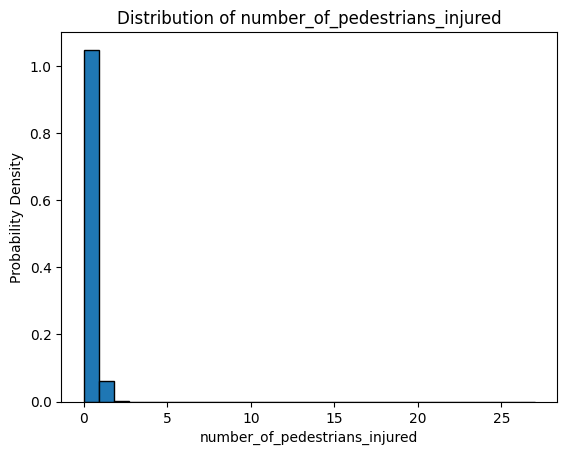

number_of_pedestrians_killed mean: 0.00 | count: 2187413
number_of_pedestrians_killed max: 6 | min: 0


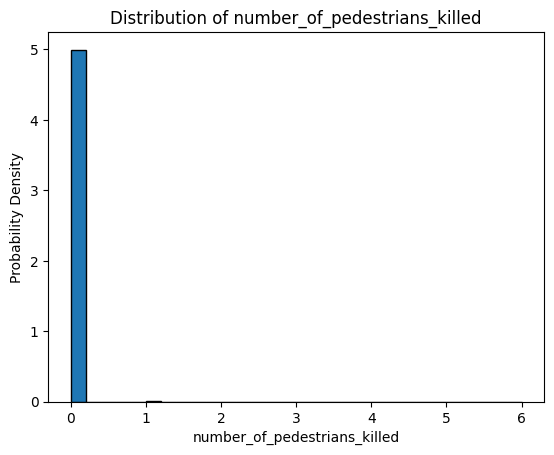

number_of_cyclist_injured mean: 0.03 | count: 2187413
number_of_cyclist_injured max: 4 | min: 0


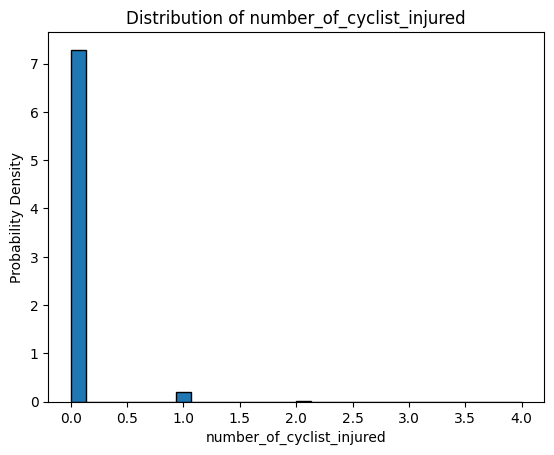

number_of_cyclist_killed mean: 0.00 | count: 2187413
number_of_cyclist_killed max: 2 | min: 0


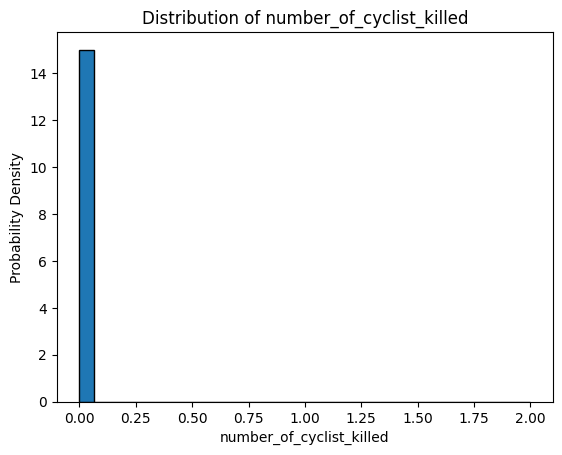

number_of_motorist_injured mean: 0.23 | count: 2187413
number_of_motorist_injured max: 43 | min: 0


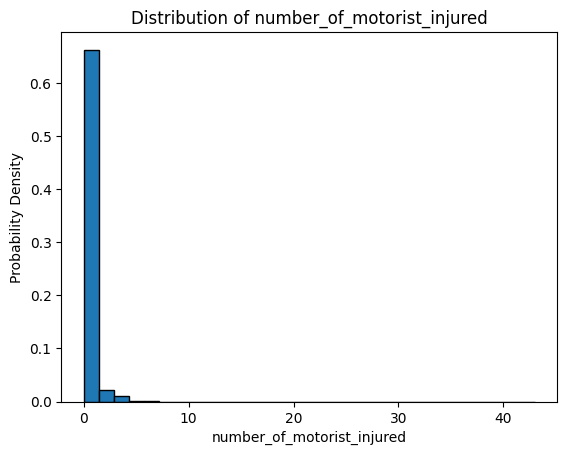

number_of_motorist_killed mean: 0.00 | count: 2187413
number_of_motorist_killed max: 5 | min: 0


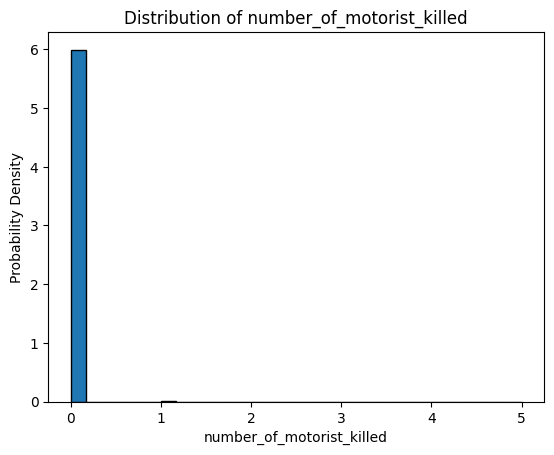

In [29]:
for name in rCrashColsNum:
    try: reporting(col=rCrashes[name], name=name, continuous=True, exclude_outliers=False)
    except Exception as e:
        print(f"Errored on name {name}, passing error message: {e}")
        continue

/var/folders/67/0s5rn4vn3sd9vsmn400fmxr00000gn/T/ipykernel_19531/2600181322.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='crash Type', data=crash_types_df, palette="mako")


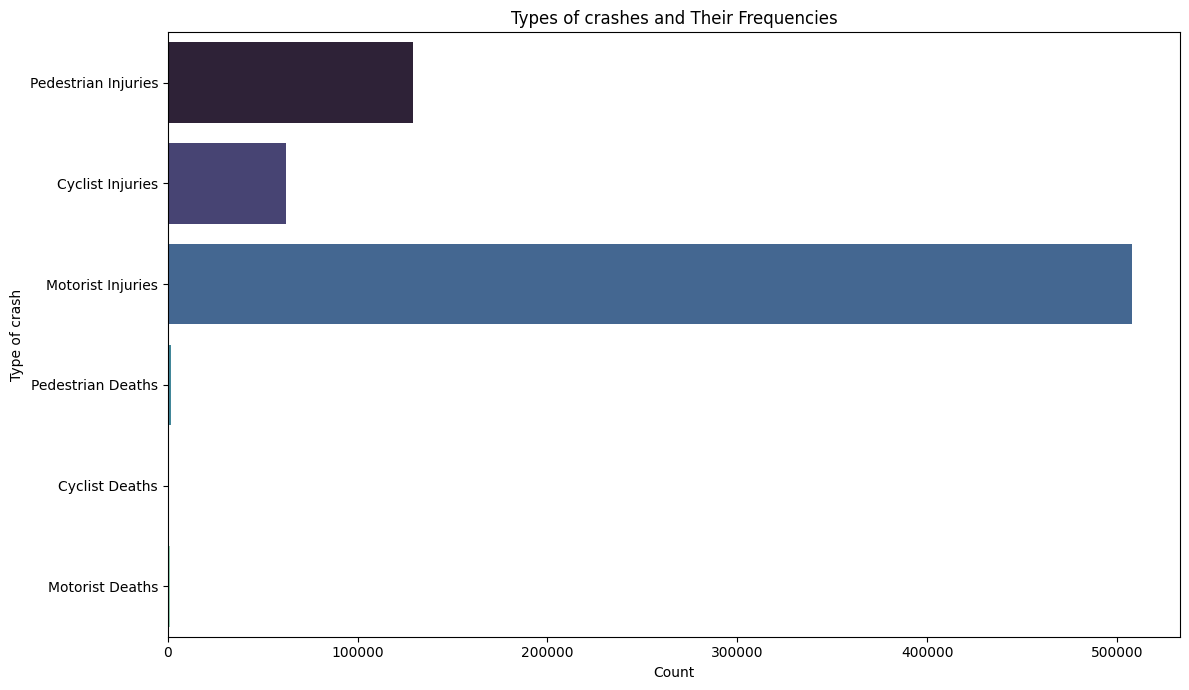

In [37]:
def type_crashes():
    types_of_crashes = {
        'Pedestrian Injuries': rCrashes['number_of_pedestrians_injured'].sum(),
        'Cyclist Injuries': rCrashes['number_of_cyclist_injured'].sum(),
        'Motorist Injuries': rCrashes['number_of_motorist_injured'].sum(),
        'Pedestrian Deaths': rCrashes['number_of_pedestrians_killed'].sum(),
        'Cyclist Deaths': rCrashes['number_of_cyclist_killed'].sum(),
        'Motorist Deaths': rCrashes['number_of_motorist_killed'].sum()
    }

    # Converting to DataFrame for easier plotting - we want the items in the dictionary, use the items function
    crash_types_df = pd.DataFrame(list(types_of_crashes.items()), columns=['crash Type', 'Count'])

    # Plot
    plt.figure(figsize=(12, 7))
    sns.barplot(x='Count', y='crash Type', data=crash_types_df, palette="mako")
    plt.title('Types of crashes and Their Frequencies')
    plt.xlabel('Count')
    plt.ylabel('Type of crash')
    plt.tight_layout()
    plt.show()

type_crashes()

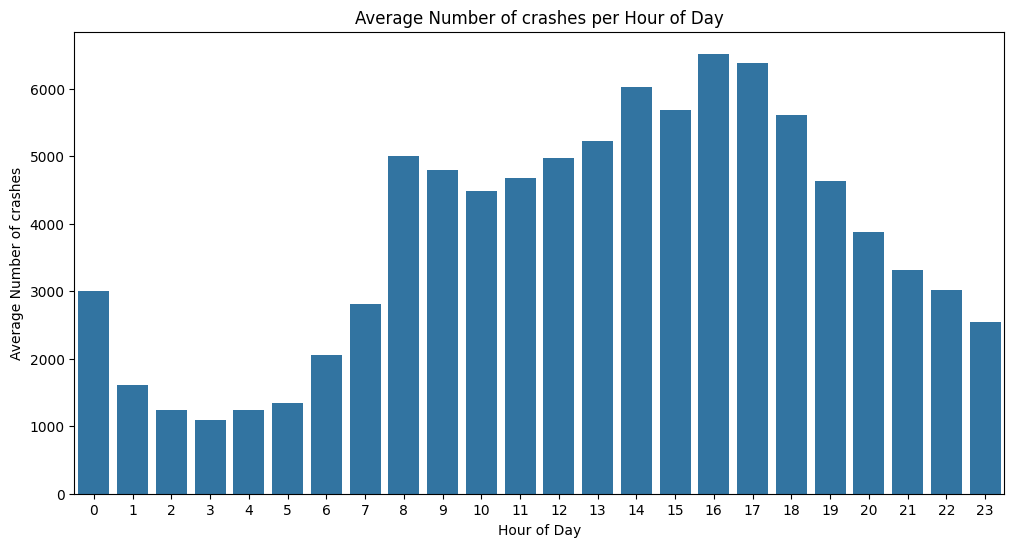

In [39]:
def crash_date(data):
    # Convert 'CRASH DATE' and 'CRASH TIME' to datetime
    data['crash_date'] = pd.to_datetime(data['crash_date'])
    data['crash_time'] = pd.to_datetime(data['crash_time'], format='%H:%M')

    # Time of Day Analysis
    data['Hour of Day'] = data['crash_time'].dt.hour

    # Group by 'Hour of Day' and calculate the average number of crashes per hour
    average_crashes_per_hour = data.groupby('Hour of Day').size() / data['Hour of Day'].nunique()

    # Plot the average number of crashes
    plt.figure(figsize=(12, 6))
    sns.barplot(x=pd.Series(average_crashes_per_hour.index), y=average_crashes_per_hour.values)
    plt.title('Average Number of crashes per Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Average Number of crashes')
    plt.xticks(range(0, 24))
    plt.show()

crash_date(rCrashes)

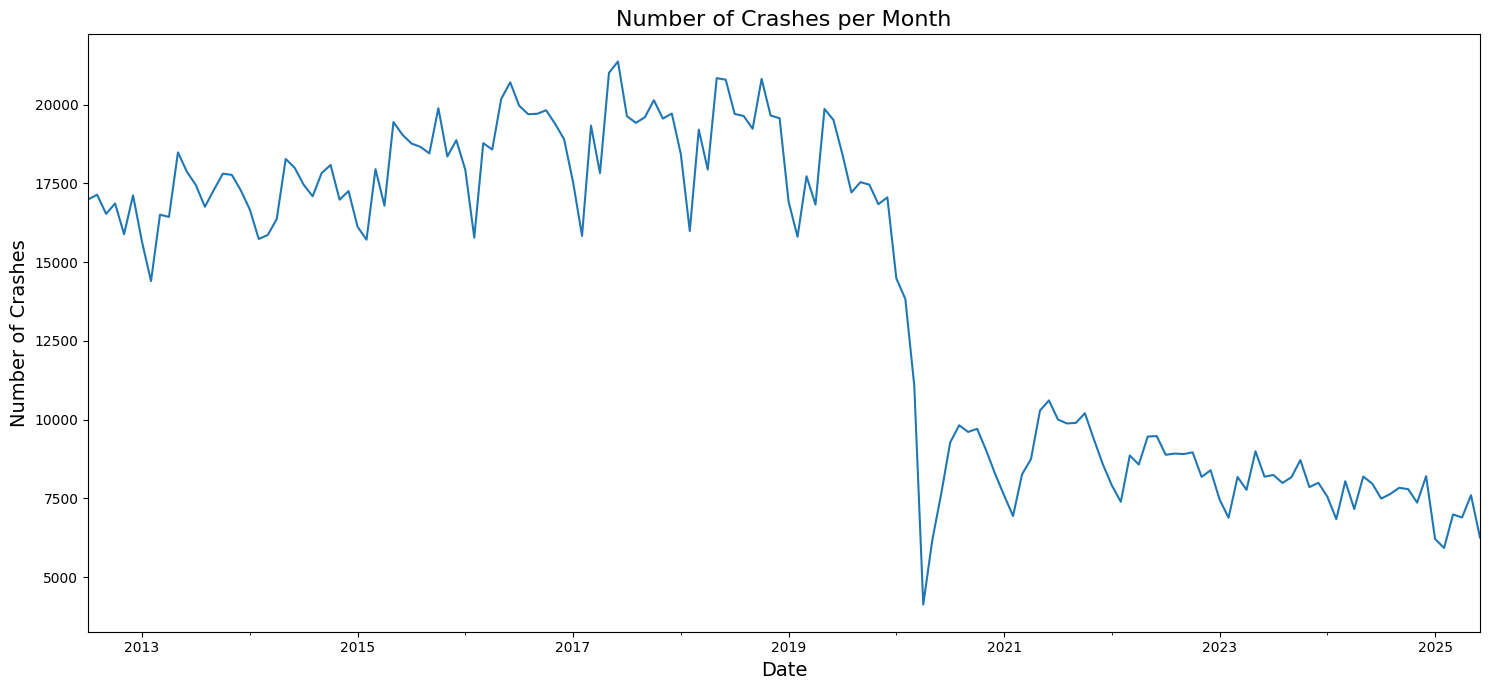

In [40]:
def crashes_monthly(data):
    data['crash_date'] = pd.to_datetime(data['crash_date'])

    # Group by month and year to get the number of crashes per month
    monthly_crashes = data.groupby(data['crash_date'].dt.to_period("M")).size()

    # Plotting the trend over time
    plt.figure(figsize=(15, 7))
    monthly_crashes.plot()
    plt.title('Number of Crashes per Month', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Number of Crashes', fontsize=14)
    plt.tight_layout()
    plt.show()

crashes_monthly(rCrashes)

/var/folders/67/0s5rn4vn3sd9vsmn400fmxr00000gn/T/ipykernel_19531/2251429797.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=borough_count.index, y=borough_count.values, palette="viridis")


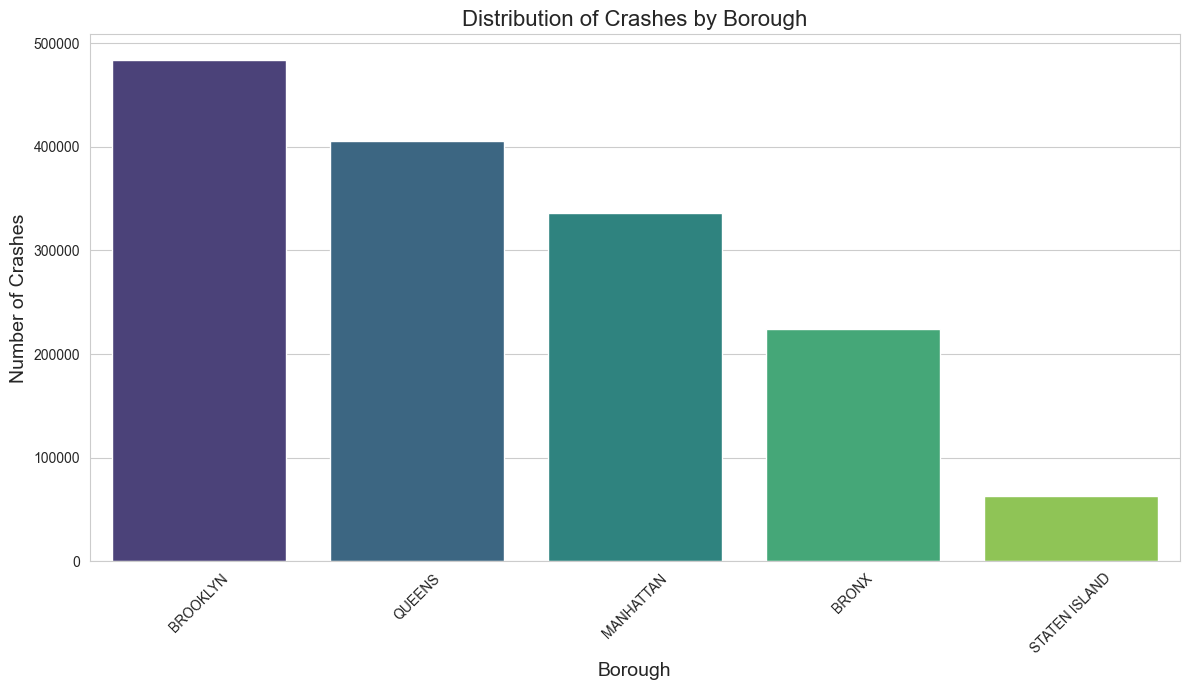

In [42]:
sns.set_style("whitegrid")

# Plotting the distribution of crashes by borough
plt.figure(figsize=(12, 7))
# Find the count of unique values of BOROUGHS. Hint: Use value_count function.
borough_count = rCrashes['borough'].value_counts()
sns.barplot(x=borough_count.index, y=borough_count.values, palette="viridis")
plt.title('Distribution of Crashes by Borough', fontsize=16)
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Feature Engineering